# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# Step 2: Load Data

In [2]:
df = pd.read_csv("bank.csv", sep=";")
print("Data Shape:", df.shape)
display(df.head())

Data Shape: (4521, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Step 3: Basic Info

In [3]:
print("\n--- Dataset Info ---")
print(df.info())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


In [4]:
print("\n--- Null Values ---")
print(df.isnull().sum())


--- Null Values ---
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [5]:
print("\n--- Unique Values in Each Column ---")
print(df.nunique())


--- Unique Values in Each Column ---
age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64


# Step 4: Target Variable Distribution

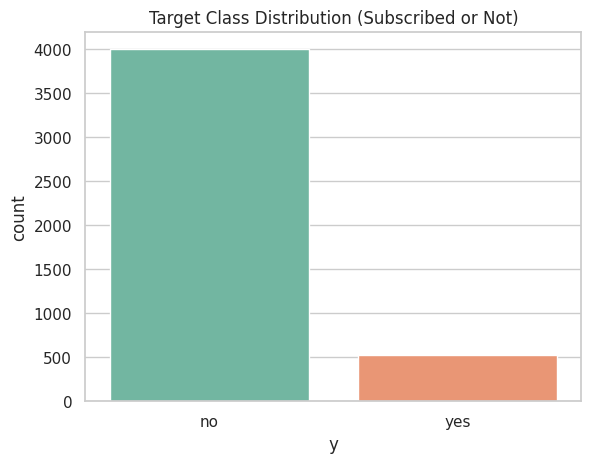

In [6]:
sns.countplot(data=df, x='y', palette='Set2')
plt.title("Target Class Distribution (Subscribed or Not)")
plt.show()

# Step 5: Visualizing Categorical Features

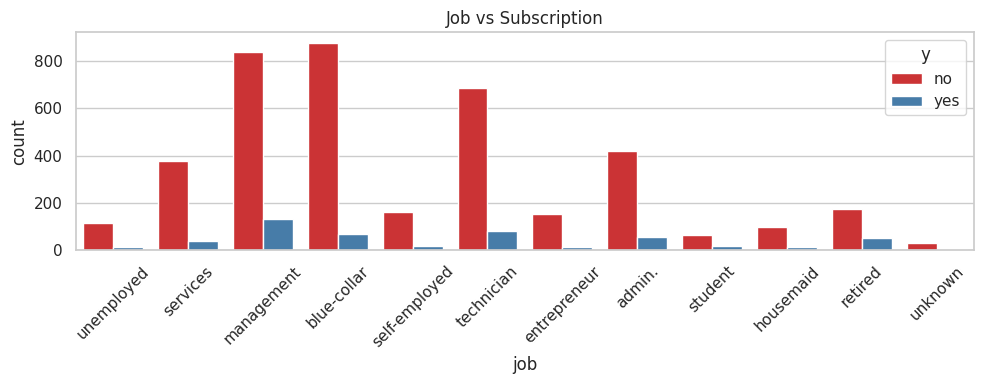

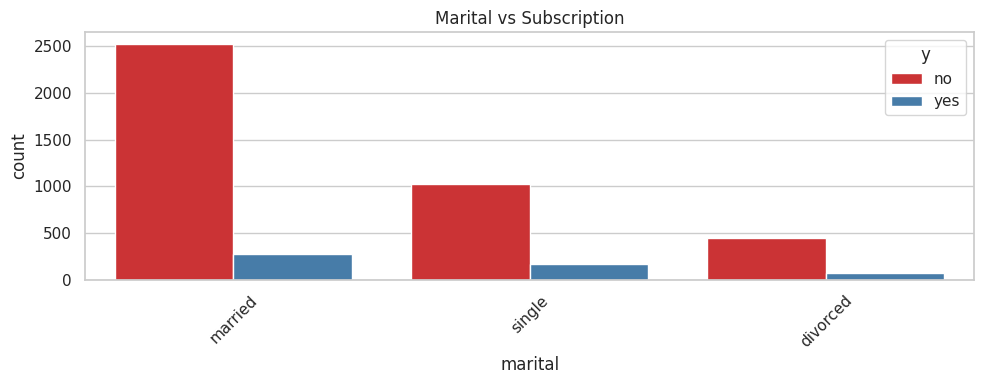

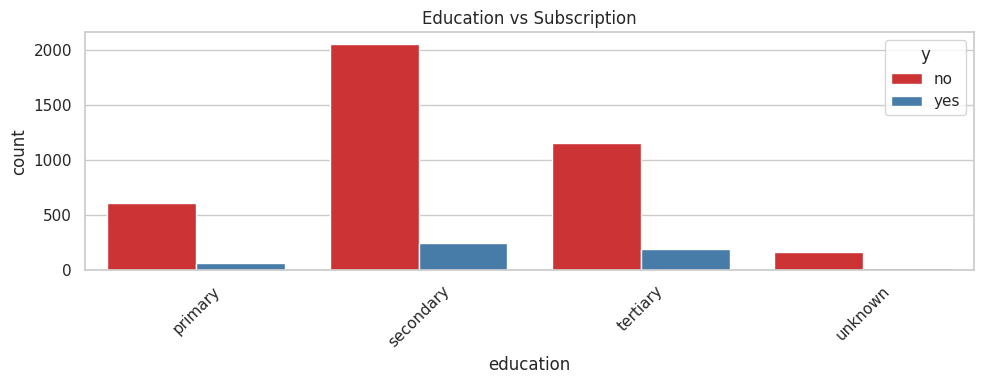

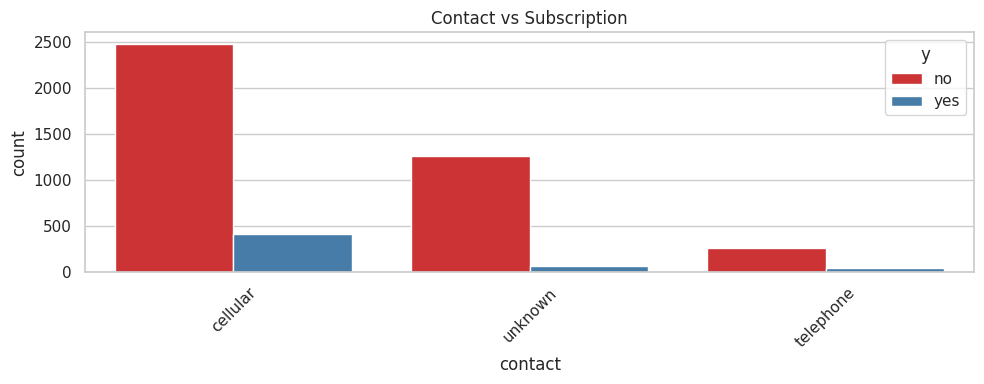

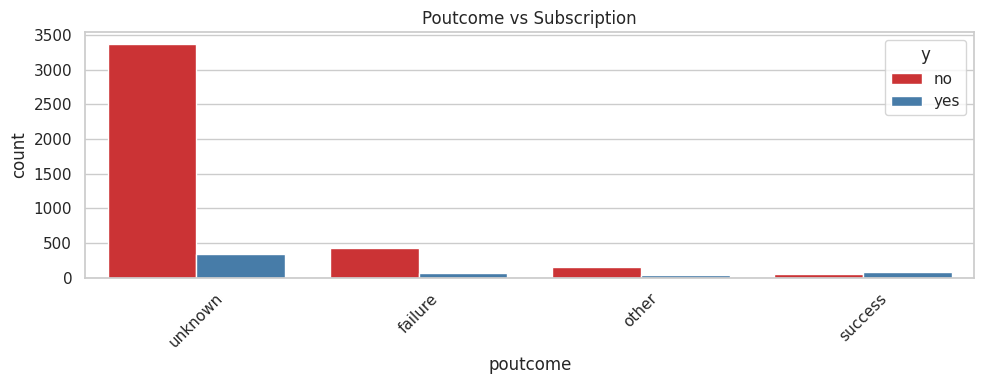

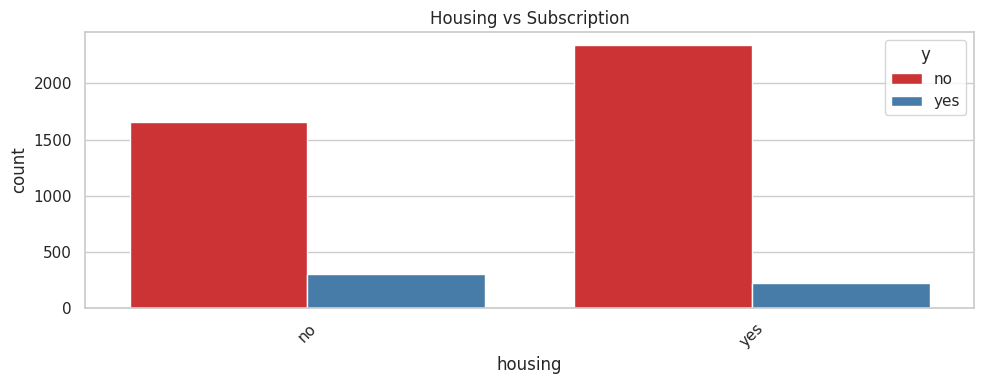

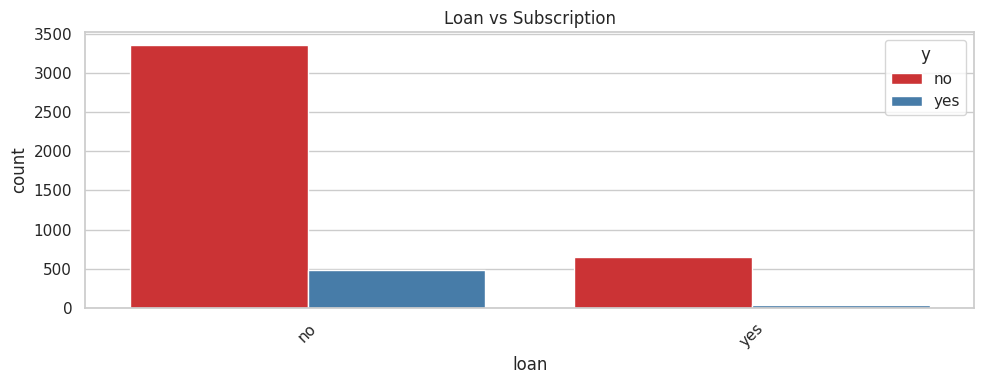

In [7]:
categorical_cols = ['job', 'marital', 'education', 'contact', 'poutcome', 'housing', 'loan']
for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, hue='y', palette='Set1')
    plt.title(f"{col.capitalize()} vs Subscription")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Step 6: Numerical Feature Distributions

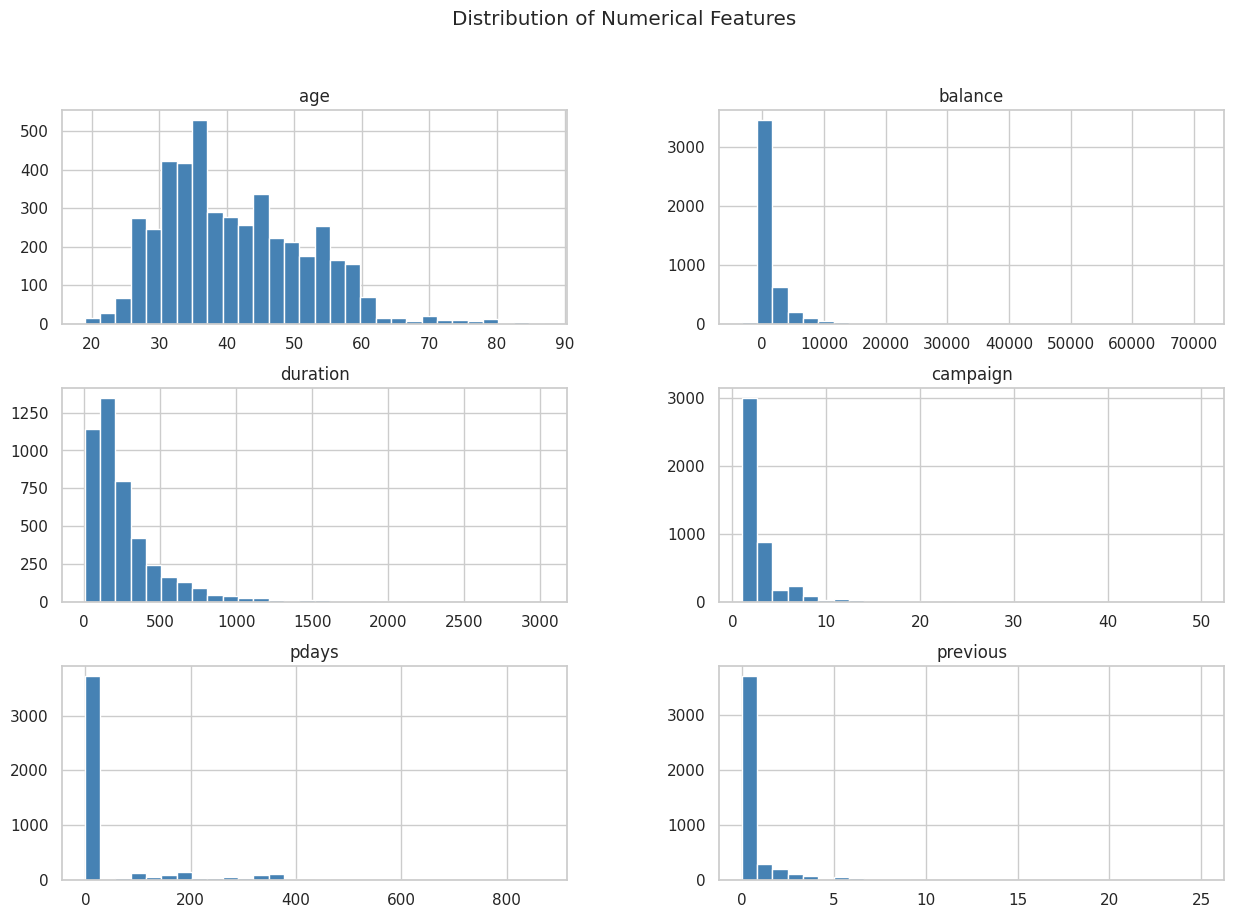

In [8]:
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
df[numerical_cols].hist(bins=30, figsize=(15, 10), color='steelblue')
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Step 7: Correlation Heatmap

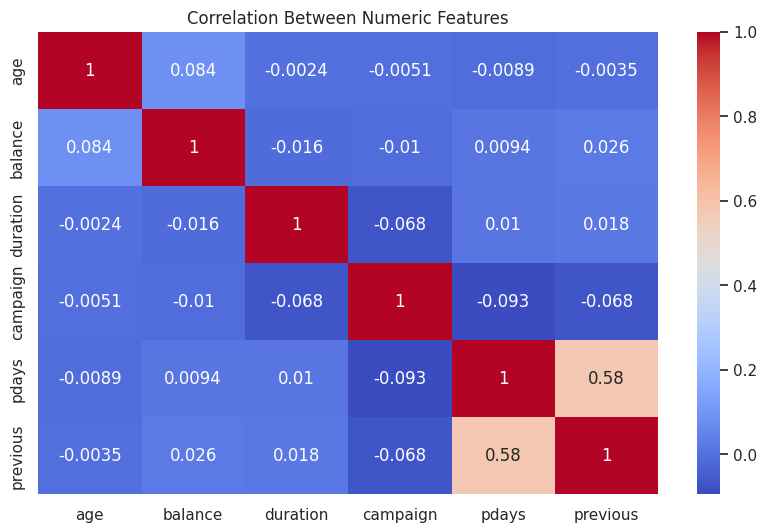

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numeric Features")
plt.show()

# Step 8: Feature Engineering

In [10]:
df['pdays'] = df['pdays'].replace(-1, np.nan)  # Convert -1 to NaN
df['contacted_before'] = df['pdays'].notnull().astype(int)  # 1 if contacted before

# Step 9: Encode Categorical Variables

In [11]:
df_model = df.copy()
le = LabelEncoder()
for col in df_model.select_dtypes(include=['object']).columns:
    df_model[col] = le.fit_transform(df_model[col])

# Step 10: Define Features and Target

In [12]:
X = df_model.drop('y', axis=1)
y = df_model['y']

# Step 11: Split Data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 12: Train Decision Tree Classifier

In [14]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

# Step 13: Evaluate Model

Accuracy Score: 0.8906077348066298

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       807
           1       0.49      0.30      0.37        98

    accuracy                           0.89       905
   macro avg       0.70      0.63      0.65       905
weighted avg       0.87      0.89      0.88       905


--- Confusion Matrix ---


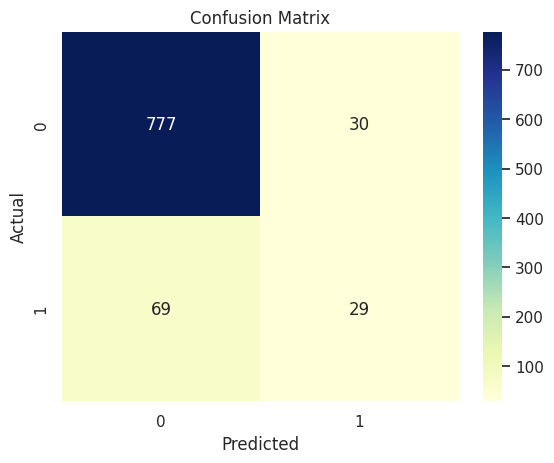

In [15]:
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))
print("\n--- Confusion Matrix ---")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 14: Visualize Decision Tree

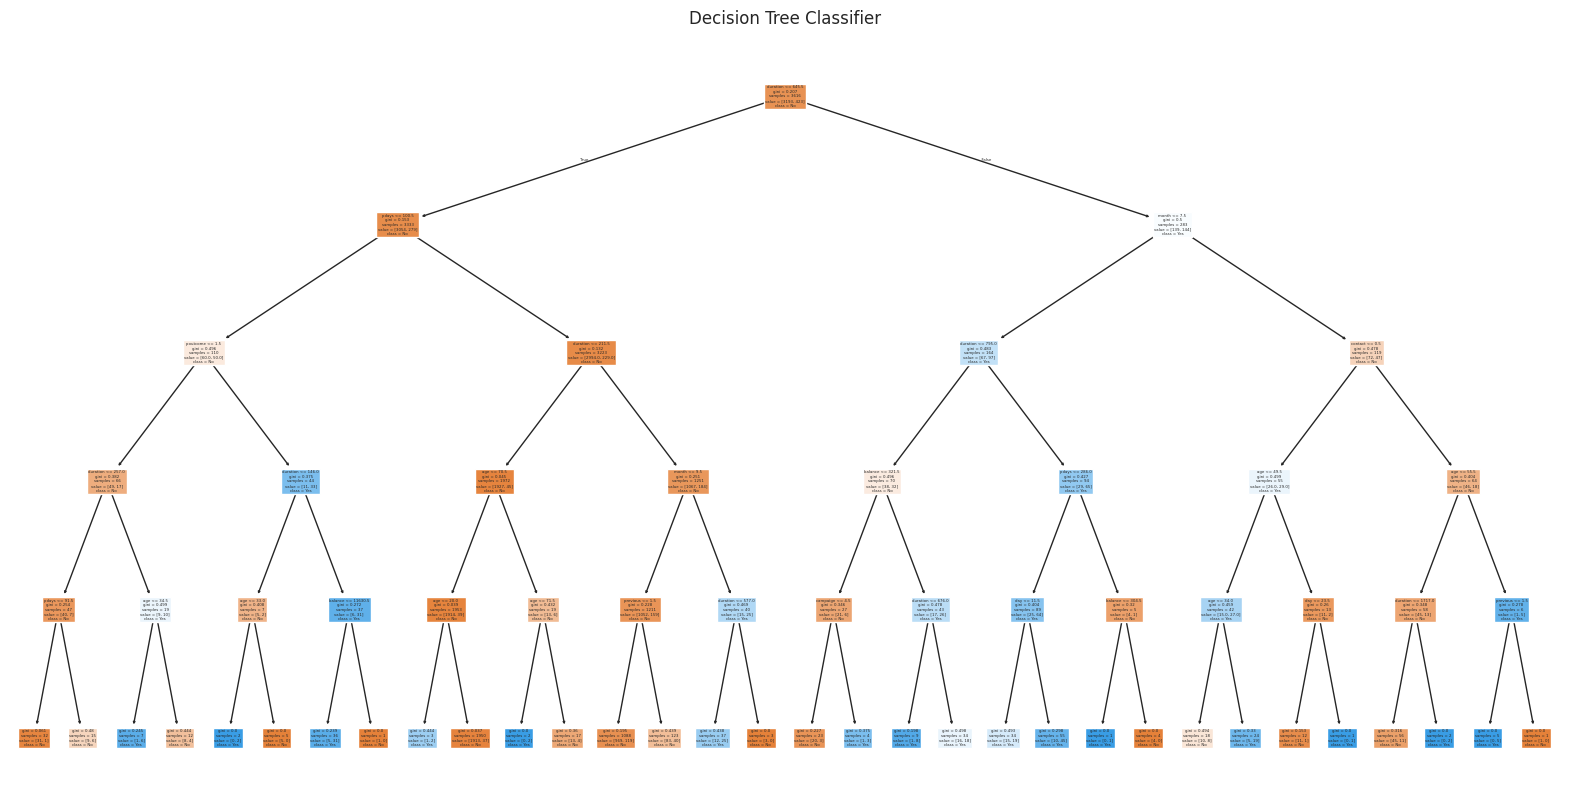

In [16]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree Classifier")
plt.show()

In [17]:
import joblib
from sklearn.tree import DecisionTreeClassifier

# Train the model (make sure X_train and y_train are defined as per your workflow)
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Save the model using joblib
joblib.dump(model, "model.pkl")

['model.pkl']